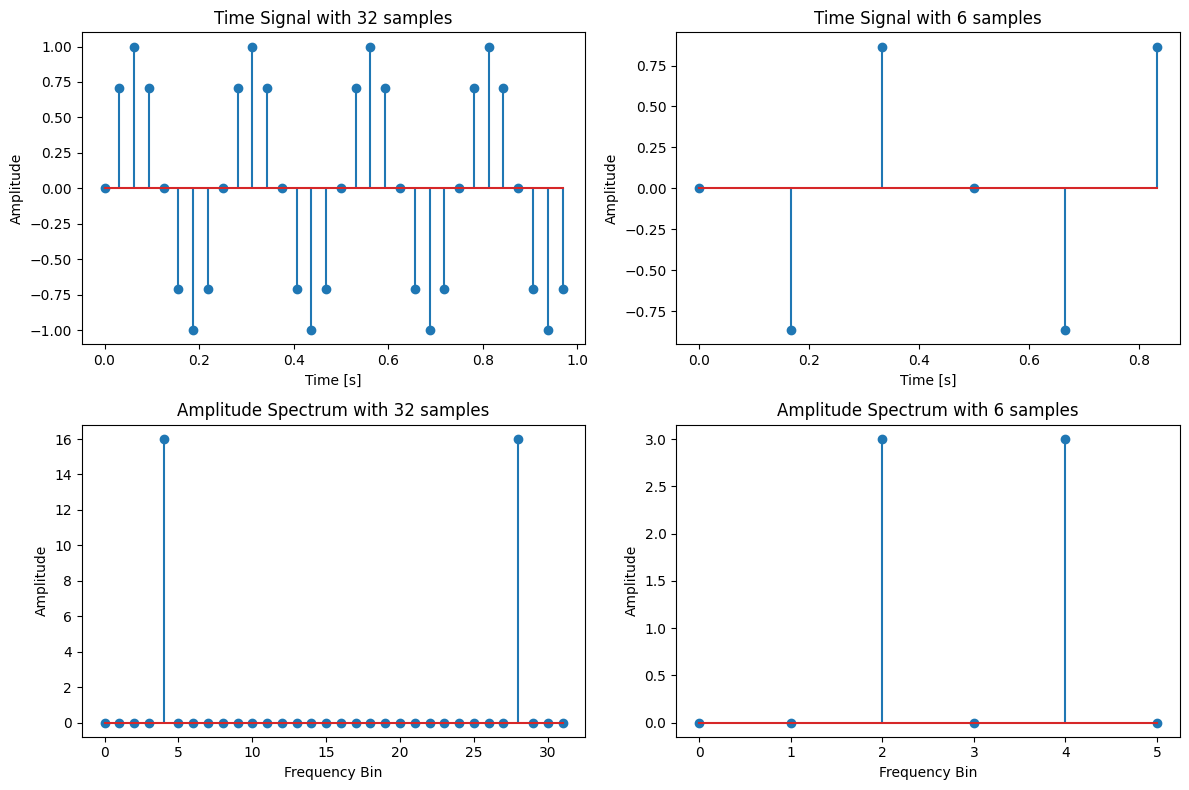

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 基本設定
Fs1 = 32   # 標本化周波数
Fs2 = 6    # 標本化周波数
f = 4      # 正弦波の周波数

# 標本化点数
# ナイキスト周波数 = 4*2 = 8
# これを下回ると情報欠損が発生し, 復元できなくなる
N1 = 32    # 標本化点数
N2 = 6     # 標本化点数

# 時間軸の生成
t1 = np.linspace(0, 1, N1, endpoint=False)
t2 = np.linspace(0, 1, N2, endpoint=False)

# 正弦波の生成
x1 = np.sin(2 * np.pi * f * t1) # 4Hz の正弦波 
x2 = np.sin(2 * np.pi * f * t2)

# 離散フーリエ変換
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

# 振幅スペクトル
amplitude_X1 = np.abs(X1)
amplitude_X2 = np.abs(X2)

# グラフ描画
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 時間信号
axs[0, 0].stem(t1, x1)
axs[0, 0].set_title('Time Signal with 32 samples')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].stem(t2, x2)
axs[0, 1].set_title('Time Signal with 6 samples')
axs[0, 1].set_xlabel('Time [s]')
axs[0, 1].set_ylabel('Amplitude')

# 振幅スペクトル
axs[1, 0].stem(np.arange(N1), amplitude_X1)
axs[1, 0].set_title('Amplitude Spectrum with 32 samples')
axs[1, 0].set_xlabel('Frequency Bin')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].stem(np.arange(N2), amplitude_X2)
axs[1, 1].set_title('Amplitude Spectrum with 6 samples')
axs[1, 1].set_xlabel('Frequency Bin')
axs[1, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


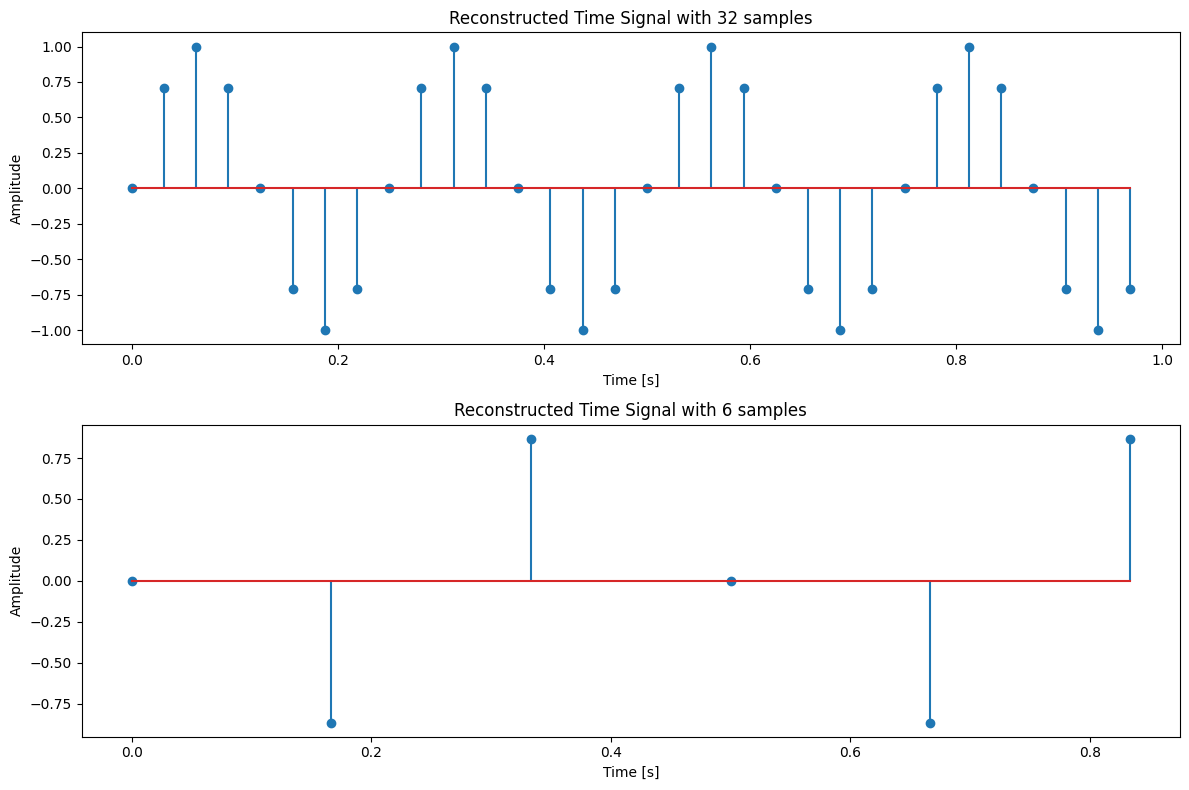

In [5]:
# 逆フーリエ変換
x1_reconstructed = np.fft.ifft(X1)
x2_reconstructed = np.fft.ifft(X2)

# グラフ描画
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].stem(t1, x1_reconstructed.real)
axs[0].set_title('Reconstructed Time Signal with 32 samples')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')

axs[1].stem(t2, x2_reconstructed.real)
axs[1].set_title('Reconstructed Time Signal with 6 samples')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


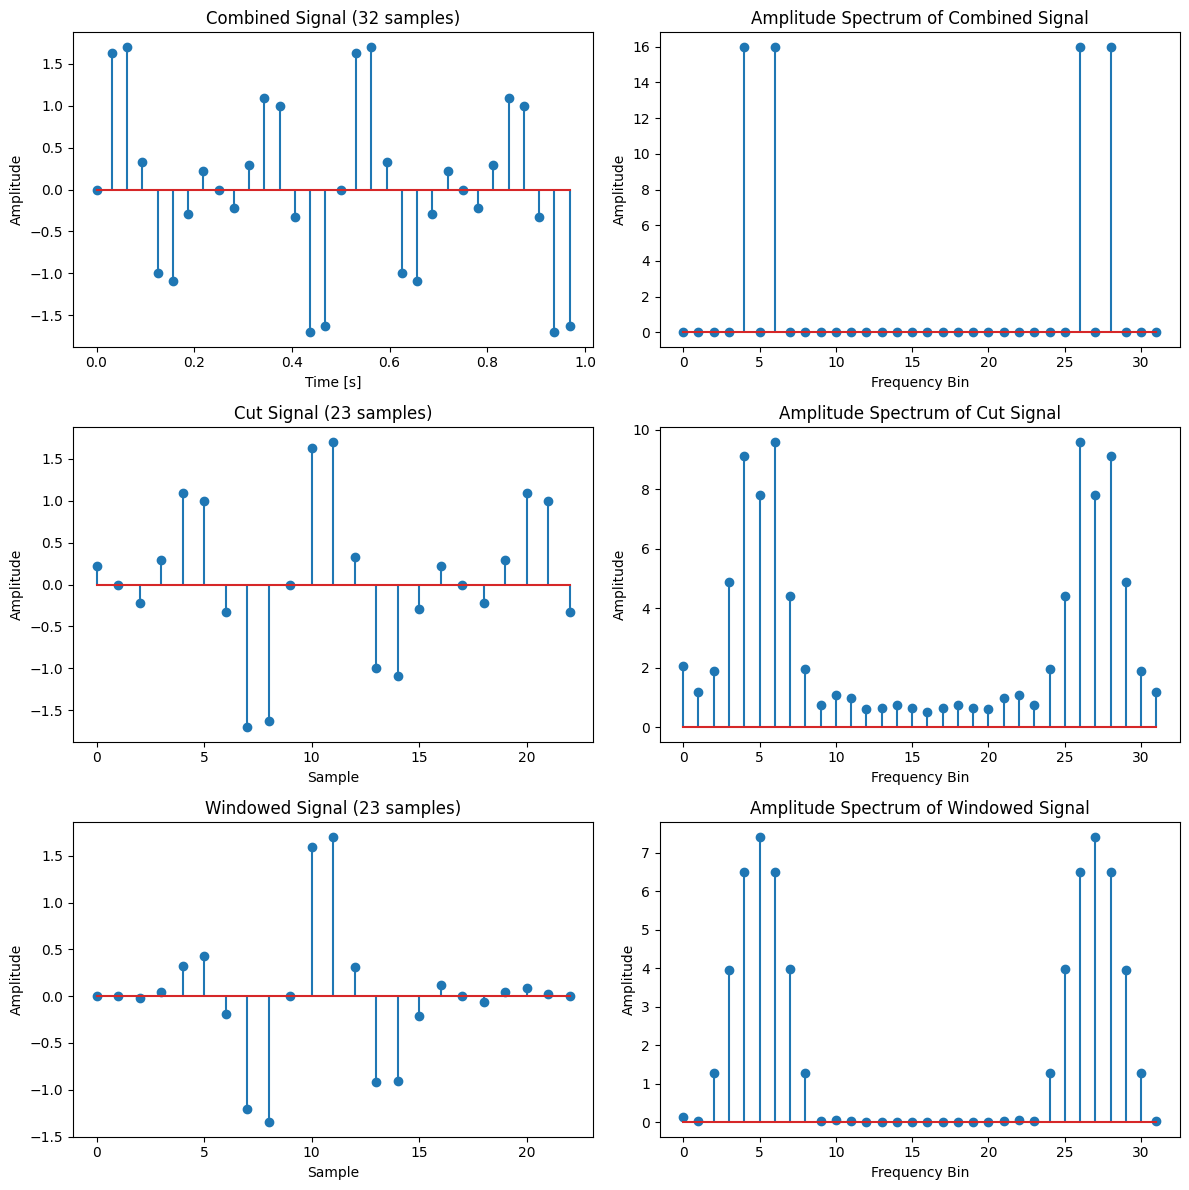

In [6]:
# 4Hzと6Hzの正弦波を合成
f2 = 6
x_combined = np.sin(2 * np.pi * f * t1) + np.sin(2 * np.pi * f2 * t1)

# 23点を切り出す
x_cut = x_combined[7:30]

# ハニング窓を適用
hann_window = np.hanning(23)
x_windowed = x_cut * hann_window

# DFT
X_combined = np.fft.fft(x_combined)
X_cut = np.fft.fft(x_cut, n=32)
X_windowed = np.fft.fft(x_windowed, n=32)

# 振幅スペクトル
amplitude_X_combined = np.abs(X_combined)
amplitude_X_cut = np.abs(X_cut)
amplitude_X_windowed = np.abs(X_windowed)

# グラフ描画
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 時間信号
axs[0, 0].stem(t1, x_combined)
axs[0, 0].set_title('Combined Signal (32 samples)')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[1, 0].stem(np.arange(23), x_cut)
axs[1, 0].set_title('Cut Signal (23 samples)')
axs[1, 0].set_xlabel('Sample')
axs[1, 0].set_ylabel('Amplitude')

axs[2, 0].stem(np.arange(23), x_windowed)
axs[2, 0].set_title('Windowed Signal (23 samples)')
axs[2, 0].set_xlabel('Sample')
axs[2, 0].set_ylabel('Amplitude')

# 振幅スペクトル
axs[0, 1].stem(np.arange(N1), amplitude_X_combined)
axs[0, 1].set_title('Amplitude Spectrum of Combined Signal')
axs[0, 1].set_xlabel('Frequency Bin')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].stem(np.arange(N1), amplitude_X_cut)
axs[1, 1].set_title('Amplitude Spectrum of Cut Signal')
axs[1, 1].set_xlabel('Frequency Bin')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].stem(np.arange(N1), amplitude_X_windowed)
axs[2, 1].set_title('Amplitude Spectrum of Windowed Signal')
axs[2, 1].set_xlabel('Frequency Bin')
axs[2, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


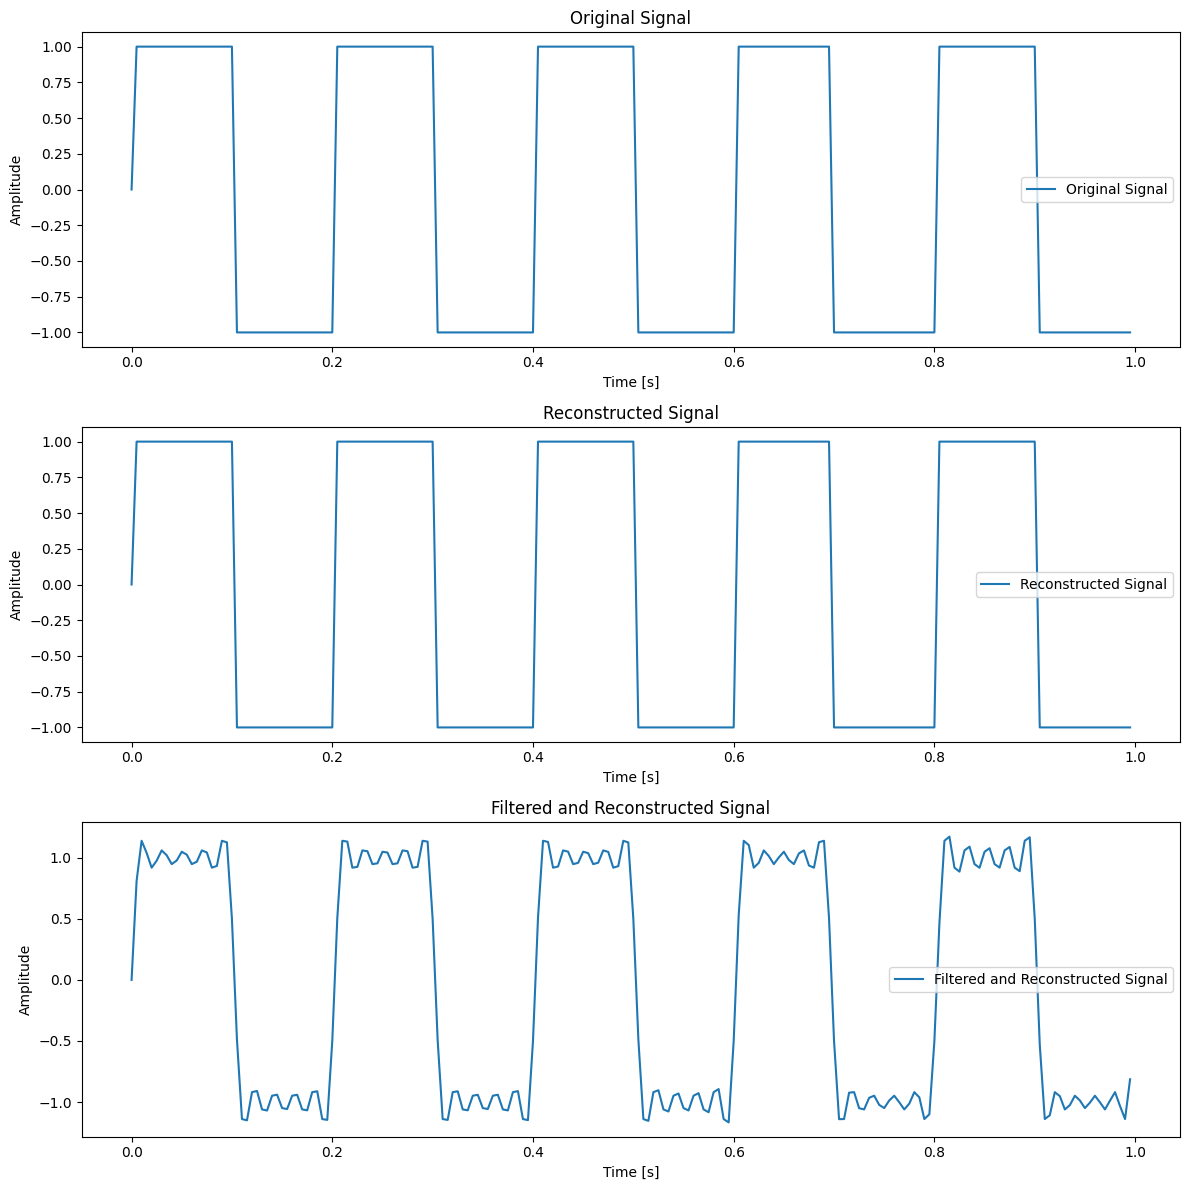

In [7]:
# 矩形波の生成
N = 200
t = np.linspace(0, 1, N, endpoint=False)
y = np.sign(np.sin(2 * np.pi * 5 * t))  # 簡単な矩形波

# FFT
Y = np.fft.fft(y)

# 逆フーリエ変換
y_reconstructed = np.fft.ifft(Y)

# ローパスフィルタ適用
cutoff = 50  # 任意のカットオフ周波数
H = np.zeros(N)
H[:cutoff] = 1
H[-cutoff:] = 1
Y_filtered = Y * H

# 逆フーリエ変換
y_filtered_reconstructed = np.fft.ifft(Y_filtered)

# グラフ描画
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].plot(t, y, label='Original Signal')
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(t, y_reconstructed.real, label='Reconstructed Signal')
axs[1].set_title('Reconstructed Signal')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(t, y_filtered_reconstructed.real, label='Filtered and Reconstructed Signal')
axs[2].set_title('Filtered and Reconstructed Signal')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()
